In [124]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets
from collections import Counter

In [125]:
data= datasets.load_iris()
X=data.data
Y=data.target

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

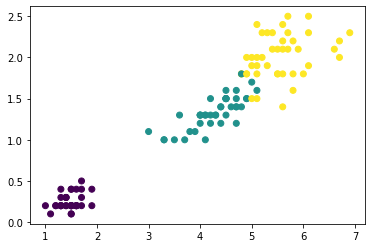

In [128]:
plt.scatter(x_train[:,2],x_train[:,3],c=y_train)

In [129]:
def eclidian_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [130]:
def _predict(x):
    L=[eclidian_distance(x,x_t) for x_t in x_train]
    k_indices=np.argsort(L)[:3]
    k_neraest_neigbour=[y_train[i] for i in k_indices]
    most_common=Counter(k_neraest_neigbour).most_common(1)
    return most_common[0][0]
predicted=[_predict(x) for x in x_test]

In [131]:
class KNN():
    def __init__(self,data,label,K):
        self.x_train=data
        self.y_train=label
        self.k=K
    def predict(self,x):
        predicted=[self._predict(x_i) for x_i in x]
        return predicted
    def _predict(self,x):
        L=[eclidian_distance(x,x_t) for x_t in self.x_train]
        k_indices=np.argsort(L)[:self.k]
        k_neraest_neigbour=[self.y_train[i] for i in k_indices]
        most_common=Counter(k_neraest_neigbour).most_common(1)
        return most_common[0][0]
        

In [132]:
knn=KNN(data=x_train,label=y_train,K=3)

In [133]:
%%timeit
predict=knn.predict(x_test)
acc=np.sum(predict==y_test)/len(x_test)
acc

29.5 ms ± 889 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Designing KNN with Cuda

In [134]:
import cupy as cp 

In [135]:
def eclidian_distance_gpu(x1,x2):
    return cp.sqrt(cp.sum((x1-x2)**2))

In [136]:
class KNN_gpu():
    def __init__(self,data,label,K):
        self.x_train=data
        self.y_train=label
        self.k=K
    def predict(self,x):
        predicted=[self._predict(x_i) for x_i in x]
        return cp.array(predicted)
    def _predict(self,x):
        L=cp.array([eclidian_distance_gpu(x,x_t) for x_t in self.x_train],dtype=cp.float32)
        k_indices=cp.argsort(L)[:self.k]
        k_neraest_neigbour=[self.y_train[i] for i in cp.asnumpy(k_indices)]
        most_common=Counter(cp.asnumpy(k_neraest_neigbour)).most_common(1)
        return most_common[0][0]
        

In [137]:
knn=KNN_gpu(data=x_train,label=y_train,K=3)

In [138]:
%%timeit 
predict=knn.predict(x_test)
acc=np.sum(cp.asnumpy(predict)==y_test)/len(x_test)
acc


106 ms ± 3.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
